<a href="https://colab.research.google.com/github/nirjalalala/learn_ml/blob/main/Day_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SUPERVISED LEARNING -LINEAR REGRESSION**

In [4]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

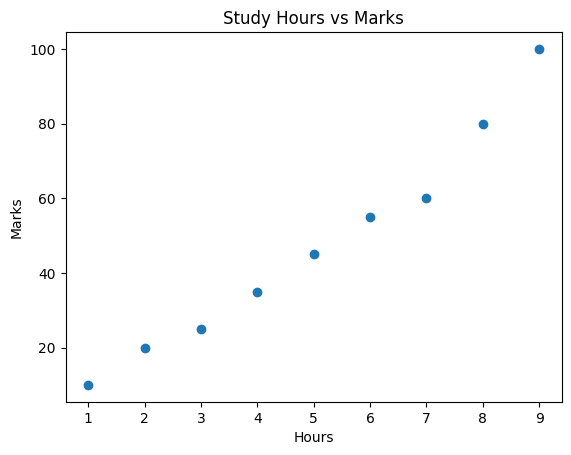

In [8]:
#Creating a sample dataset of score vs study hours

hours= np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
marks = np.array([10,20,25,35,45,55,60,80,100])

# scatter plot
plt.scatter(hours, marks)
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Study Hours vs Marks')
plt.show()

In [11]:
#Splitting our dataset into training data and testing data.

X_train, X_test, y_train, y_test = train_test_split(hours, marks, test_size=0.2, random_state=42)

In [12]:
print(f"Training set size = {len(X_train)}")
print(f"Testing set size = {len(X_test)}")

Training set size = 7
Testing set size = 2


In [13]:
#Building a model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

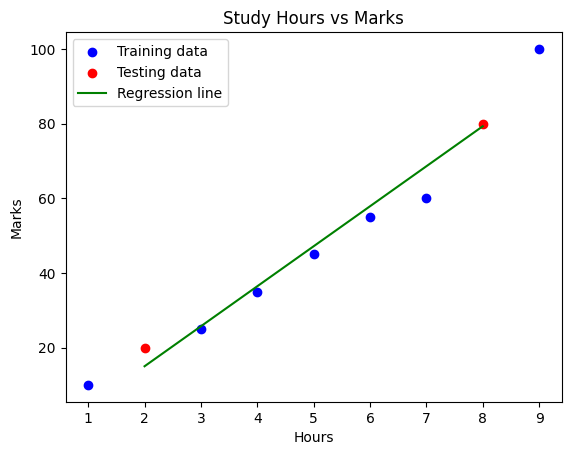

In [21]:
#Visualize the model

predicted = model.predict(X_test)

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_test, predicted, color='green', label='Regression line')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Study Hours vs Marks')
plt.legend()
plt.show()

In [23]:
#Evaluate model performance

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

#R-squared error
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

#Printing the metrics
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

print(f"\nTraining R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")

Training MSE: 31.632653061224477
Testing MSE: 12.755102040816219

Training R-squared: 0.9560906515580737
Testing R-squared: 0.9858276643990931


##Fitting a linear regression model on real-data

In [24]:
#import everything from above cell
#Run that cell, if not already done

In [6]:
#Load the dataset
df = pd.read_csv('income_data.csv')

#Print first 5 rows to ensure the dataset has been loaded properly.
df.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


All columns are numeric.<br> There are no missing values.<br> Predicting variable = income <br> Target Variable = happiness

In [19]:
#Defining our features and label
X = df['income'].values.reshape(-1,1)
y = df['happiness'].values

#Splitting our dataset into training-data and testing-data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating a model
reg = LinearRegression()

#Fitting the model
reg.fit(X_train, y_train)

#Making predictions
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

#Evaluating the model
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Test-data): {mse_test}")
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (Test-data): {mse_test}")

r2_score_test = r2_score(y_test, y_test_pred)
print(f"\nR-squared Score (Test-data): {r2_score_test}")
r2_score_train = r2_score(y_train, y_train_pred)
print(f"R-squared Score (Test-data): {r2_score_test}")

Mean Squared Error (Test-data): 0.5901463943118466
Mean Squared Error (Test-data): 0.5901463943118466

R-squared Score (Test-data): 0.6662585264508232
R-squared Score (Test-data): 0.6662585264508232


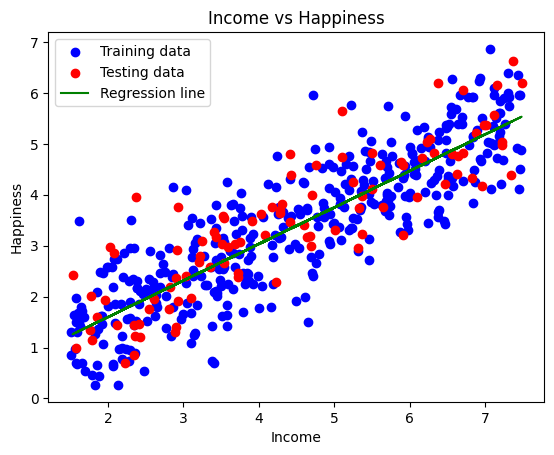

In [16]:
#Visualizing model performance

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_test, y_test_pred, color='green', label='Regression line')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Income vs Happiness')
plt.legend()
plt.show()

Here,<br>
Blue dots represent actual happiness index for given income in the training data set.<br>
Red dots represent actual happiness index for given income in the testing data set.<br>
Green line is the best-fit line that our model uses to predict happiness index for a given income.